## Netflix Data Visualization Assignment.

#### 1. Importing Libraries

In [2]:
import pandas as pd # used for data manipulation and analysis
import numpy as np # package for scientific computing
import matplotlib.pyplot as plt # for static and interactive visualizations
import zipfile # used to Zip and unzip files
import os # Provide a module to interact with operating system
import seaborn as sns # For statistical data visualization
import plotly.express as px # reating interactive and publication-quality visualizations.


In [3]:
# Specify the path to the zip file
zip_file_path = r'C:\Users\user\Downloads\New\netflix_data.zip'

# Specify the destination folder for the unzipped files
destination_folder = r'A:\Programming in Python and R\Module 4\NetflixData'

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# Get the list of files in the destination folder
files = os.listdir(destination_folder)

# Assuming there's only one file after unzipping, you can rename it
if len(files) == 1:
    old_file_path = os.path.join(destination_folder, files[0])
    new_file_path = os.path.join(destination_folder, 'Netflix_shows_movies')

    # Rename the file
    os.rename(old_file_path, new_file_path)
    print(f"The dataset has been unzipped and renamed to 'Netflix_shows_movies'.")
else:
    print("Error: There should be exactly one file after unzipping.")

The dataset has been unzipped and renamed to 'Netflix_shows_movies'.


#### 2. Reading the Dataset and performing Data Cleaning

In [4]:
# Reading the netflix data and displaying the first 10 rows:
df = pd.read_csv(r"A:\Programming in Python and R\Module 4\Netflix\Netflix_shows_movies.csv")
df[:10]

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   
5  80163890  TV Show                                  Apaches   
6  70304989    Movie                                 Automata   
7  80164077    Movie       Fabrizio Copano: Solo pienso en mi   
8  80117902  TV Show                             Fire Chasers   
9  70304990    Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
1                              NaN   
2                              NaN   
3                              NaN   
4                 Fernando Lebrija   
5                              NaN   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   
8                              NaN   
9                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
5  Alberto Ammann, Eloy Azorín, Verónica Echegui,...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   
8                                                NaN   
9  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country         date_added  \
0        United States, India, South Korea, China  September 9, 2019   
1                                  United Kingdom  September 9, 2016   
2                                   United States  September 8, 2018   
3                                   United States  September 8, 2018   
4                                   United States  September 8, 2017   
5                                           Spain  September 8, 2017   
6          Bulgaria, United States, Spain, Canada  September 8, 2017   
7                                           Chile  September 8, 2017   
8                                   United States  September 8, 2017   
9  United States, United Kingdom, Denmark, Sweden  September 8, 2017   

   release_year    rating  duration  \
0          2019     TV-PG    90 min   
1          2016     TV-MA    94 min   
2          2013  TV-Y7-FV  1 Season   
3          2016     TV-Y7  1 Season   
4          2017     TV-14    99 min   
5          2016     TV-MA  1 Season   
6          2014         R   110 min   
7          2017     TV-MA    60 min   
8          2017     TV-MA  1 Season   
9          2014         R    90 min   

                                           listed_in  \
0                 Children & Family Movies, Comedies   
1                                    Stand-Up Comedy   
2                                           Kids' TV   
3                                           Kids' TV   
4                                           Comedies   
5  Crime TV Shows, International TV Shows, Spanis...   
6  International Movies, Sci-Fi & Fantasy, Thrillers   
7                                    Stand-Up Comedy   
8                    Docuseries, Science & Nature TV   
9                      Action & Adventure, Thrillers   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...  
5  A young journalist is forced into a life of cr...  
6  In a dystopian future, a

In [5]:
# Exploring available columns.
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# Removing mins in the duration_min column to remain only with numerical values for movies

df.duration =df.duration.apply(lambda x: x.replace("min", "") if "min" in x else x)
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG       90   Children & Family Movies, Comedies   
1     TV-MA       94                      Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14       99                             Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [7]:
# Removing season in the duration column to remain only with numerical values for TV Show

df.duration =df.duration.apply(lambda x: x.replace("Season", "") if "Season" in x else x)
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating duration                           listed_in  \
0     TV-PG      90   Children & Family Movies, Comedies   
1     TV-MA      94                      Stand-Up Comedy   
2  TV-Y7-FV       1                             Kids' TV   
3     TV-Y7       1                             Kids' TV   
4     TV-14      99                             Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [8]:
# Checking for duplicates

df.duplicated().sum()

0

In [9]:
# Getting info about the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [10]:
# Addressing Null Values

df.shape

(6234, 12)

In [11]:
# Getting NUll values in Ascending Order

df.isnull().sum().sort_values(ascending=False)

director        1969
cast             570
country          476
date_added        11
rating            10
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
 # Fill null values with the mode value in country column since it is categorical data
Mode_country = df['country'].mode()[0] 
df['country'] = df['country'].fillna(Mode_country)

In [14]:
# Removing rows with Null values in teh column date_added :

df = df.dropna(subset=["date_added"])

In [15]:
#Using Impute functionality to fill blanks

columns_to_impute = ['director', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    df[column].fillna("Unknown", inplace=True)


In [16]:
# Checking for the Null Vaulues in the Dataset:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### 3. Exploratory Data Analysis

In [17]:
# Making a copy of Netflix dataset for Analysis

df1 = df.copy()
df1.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                   Unknown   
2                   Unknown   
3                   Unknown   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating duration                           listed_in  \
0     TV-PG      90   Children & Family Movies, Comedies   
1     TV-MA      94                      Stand-Up Comedy   
2  TV-Y7-FV       1                             Kids' TV   
3     TV-Y7       1                             Kids' TV   
4     TV-14      99                             Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [18]:
# Analysis of type column
df1["type"].value_counts()

type
Movie      4264
TV Show    1959
Name: count, dtype: int64

In [19]:
# Analysis of ratings
df1.rating.value_counts()

rating
TV-MA       2025
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
Unknown        9
UR             7
NC-17          2
Name: count, dtype: int64

In [20]:
# Displaying top 10 countries with most watching
df1.country.value_counts().head(10)

country
United States     2500
India              777
United Kingdom     347
Japan              175
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: count, dtype: int64

In [21]:
# Perfroming analysis of movies only:
movies = df1.loc[(df1["type"]=="Movie")]
movies.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
4  80125979  Movie                             #realityhigh   
6  70304989  Movie                                 Automata   
7  80164077  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                          Unknown   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
4                             United States  September 8, 2017          2017   
6    Bulgaria, United States, Spain, Canada  September 8, 2017          2014   
7                                     Chile  September 8, 2017          2017   

  rating duration                                          listed_in  \
0  TV-PG      90                  Children & Family Movies, Comedies   
1  TV-MA      94                                     Stand-Up Comedy   
4  TV-14      99                                            Comedies   
6      R     110   International Movies, Sci-Fi & Fantasy, Thrillers   
7  TV-MA      60                                     Stand-Up Comedy   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
4  When nerdy high schooler Dani finally attracts...  
6  In a dystopian future, an insurance adjuster f...  
7  Fabrizio Copano takes audience participation t...

In [22]:
#creating a Dataset for TV shows only:
    
tv_show = df1.loc[(df1["type"]=="TV Show")]
tv_show.head()

show_id     type                             title director  \
2   70234439  TV Show                Transformers Prime  Unknown   
3   80058654  TV Show  Transformers: Robots in Disguise  Unknown   
5   80163890  TV Show                           Apaches  Unknown   
8   80117902  TV Show                      Fire Chasers  Unknown   
26  80244601  TV Show                   Castle of Stars  Unknown   

                                                 cast        country  \
2   Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3   Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
8                                             Unknown  United States   
26  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...  United States   

           date_added  release_year    rating duration  \
2   September 8, 2018          2013  TV-Y7-FV       1    
3   September 8, 2018          2016     TV-Y7       1    
5   September 8, 2017          2016     TV-MA       1    
8   September 8, 2017          2017     TV-MA       1    
26  September 7, 2018          2015     TV-14       1    

                                            listed_in  \
2                                            Kids' TV   
3                                            Kids' TV   
5   Crime TV Shows, International TV Shows, Spanis...   
8                     Docuseries, Science & Nature TV   
26  International TV Shows, Romantic TV Shows, TV ...   

                                          description  
2   With the help of three human allies, the Autob...  
3   When a prison ship crash unleashes hundreds of...  
5   A young journalist is forced into a life of cr...  
8   As California's 2016 fire season rages, brave ...  
26  As four couples with different lifestyles go t...

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4264 entries, 0 to 5580
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4264 non-null   int64 
 1   type          4264 non-null   object
 2   title         4264 non-null   object
 3   director      4264 non-null   object
 4   cast          4264 non-null   object
 5   country       4264 non-null   object
 6   date_added    4264 non-null   object
 7   release_year  4264 non-null   int64 
 8   rating        4264 non-null   object
 9   duration      4264 non-null   object
 10  listed_in     4264 non-null   object
 11  description   4264 non-null   object
dtypes: int64(2), object(10)
memory usage: 433.1+ KB


In [24]:
# Changing the data type to Int64

movies["duration"]=movies["duration"].astype("int64")
movies.describe()

C:\Users\user\AppData\Local\Temp\ipykernel_7004\3032908047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["duration"]=movies["duration"].astype("int64")


show_id  release_year     duration
count  4.264000e+03   4264.000000  4264.000000
mean   7.561991e+07   2012.353424    99.109991
std    1.287763e+07      9.736288    28.071761
min    2.477470e+05   1942.000000     3.000000
25%    7.030419e+07   2012.000000    86.000000
50%    8.015858e+07   2016.000000    98.000000
75%    8.099163e+07   2017.000000   115.000000
max    8.123573e+07   2020.000000   312.000000

In [26]:
# Checking the longest movie:

longest_movie = movies.loc[(movies["duration"]==np.max(movies.duration))]
longest_movie

show_id   type                       title director  \
4315  80988062  Movie  Black Mirror: Bandersnatch  Unknown   

                                                   cast        country  \
4315  Fionn Whitehead, Will Poulter, Craig Parkinson...  United States   

             date_added  release_year rating  duration  \
4315  December 28, 2018          2018  TV-MA       312   

                                           listed_in  \
4315  Dramas, International Movies, Sci-Fi & Fantasy   

                                            description  
4315  In 1984, a young programmer begins to question...

In [27]:
# Checking the shortest Movie

shortest_movie = movies.loc[(movies["duration"]==np.min(movies.duration))]
shortest_movie

show_id   type   title                           director     cast  \
2478  70304298  Movie  Silent  Limbert Fabian, Brandon Oldenburg  Unknown   

            country    date_added  release_year rating  duration  \
2478  United States  June 4, 2019          2014  TV-Y7         3   

                                       listed_in  \
2478  Children & Family Movies, Sci-Fi & Fantasy   

                                            description  
2478  "Silent" is an animated short film created by ...

In [28]:
# Analysis of Genre
df1["listed_in"].unique()

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies',
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Docuseries, Science & Nature TV', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Children & Family Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Documentaries', 'Horror Movies, Thrillers',
       'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Docuseries', 'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, 

Number of unique values in 'listed_in': 461


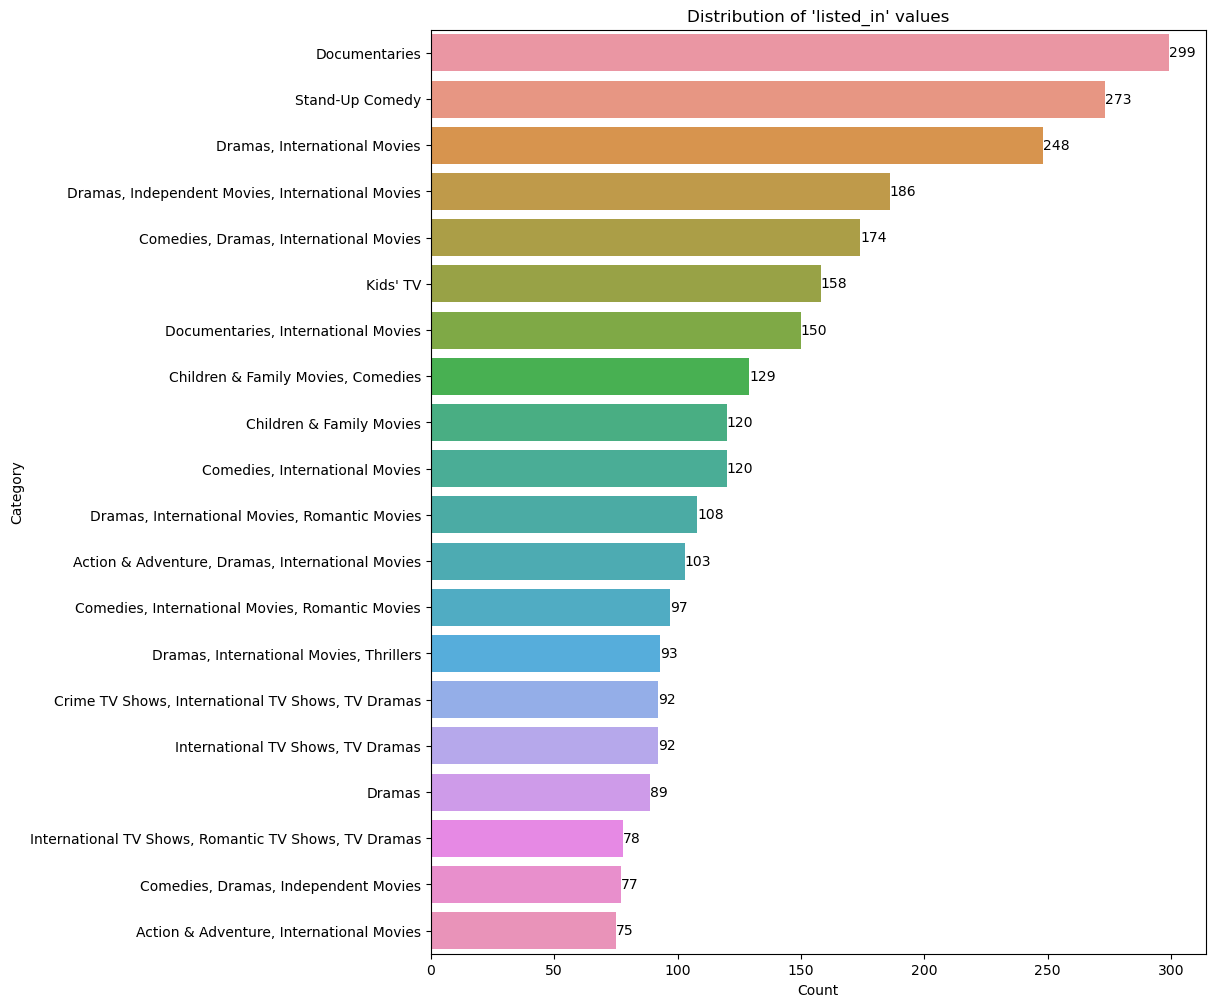

In [29]:
# Display the number of unique values in the 'listed_in' column
print("Number of unique values in 'listed_in':", len(df1['listed_in'].unique()))

# Set a custom color palette
custom_palette = sns.color_palette("hls", 8)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 12))
sns.set_palette(custom_palette)
ax = sns.countplot(data=df1, y="listed_in", order=df1['listed_in'].value_counts().index[:20])
ax.bar_label(ax.containers[0])
plt.title("Distribution of 'listed_in' values")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [30]:
# A plot for Rating Distribution using Plotly Library.
fig = px.histogram(df,x="rating", title="Rating distribution", color="rating")
# Update the layout and add box plots
fig.update_layout(bargap=0.2)

fig.show()

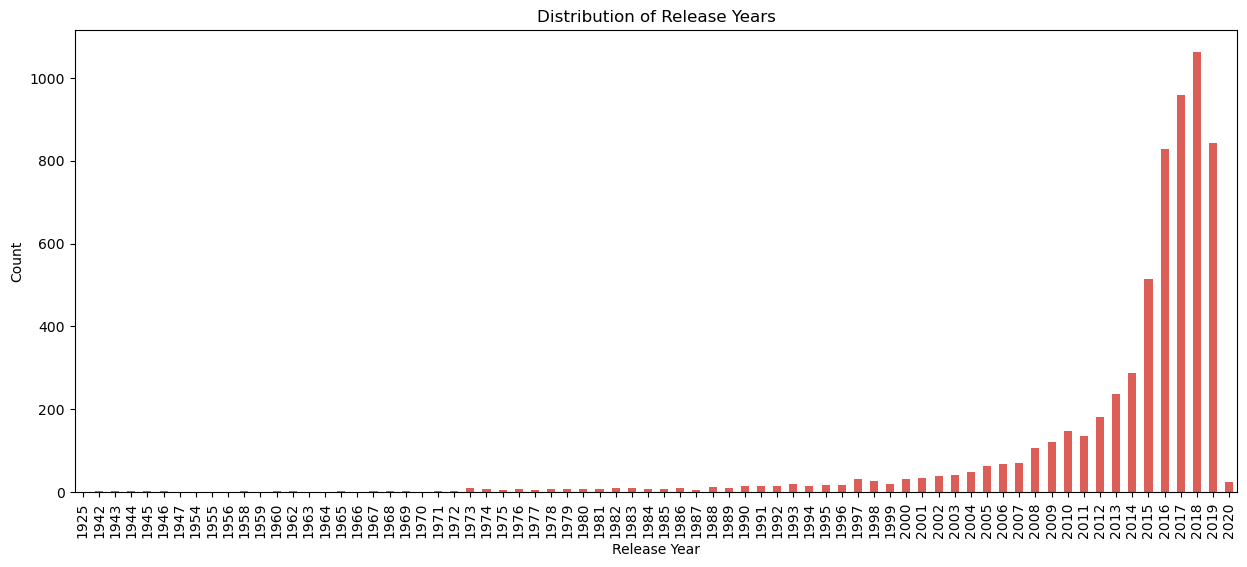

In [33]:
# Plotting the distribution of 'release_year'
plt.figure(figsize=(15, 6))
df1['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

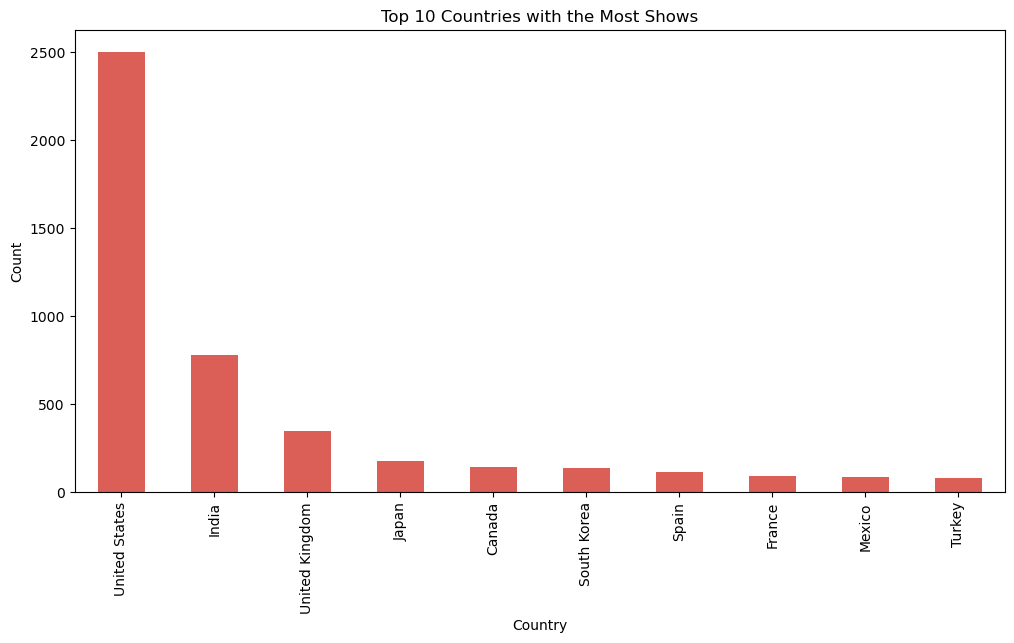

In [32]:
# Plotting a bar chart for the top 10 countries with the most shows
top_countries = df1['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries with the Most Shows')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()